<a href="https://colab.research.google.com/github/Manarsenic/stock-price-predictor/blob/main/stock_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhanced Stock Price Predictor

This interactive Google Colab notebook provides a comprehensive and in-depth analysis of stock market data. It goes beyond a simple script to demonstrate advanced data analysis, feature engineering, and a Long Short-Term Memory (LSTM) deep learning model for prediction.

### Key Features:
- **Interactive Widgets**: Easily select a stock ticker and date range without modifying the code.
- **Advanced Data Analysis**: Visualize key metrics like historical price trends and moving averages.
- **Deep Learning Model**: Build and train a sophisticated LSTM model, a type of neural network well-suited for time-series data.
- **Model Evaluation**: Assess the model's performance using standard metrics like Root Mean Squared Error (RMSE).

### Author: Manas Kumar

In [7]:
# Install necessary libraries if they aren't already present in the Colab environment
!pip install yfinance scikit-learn pandas matplotlib tensorflow ipywidgets

Import all the libraries you'll need for the entire project.

In [8]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

#libraries for machine learning and dl

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#for interactive elements and display

from ipywidgets import interact,widgets
from IPython.display import display



print("all required librarues have been successfully inported")

all required librarues have been successfully inported


## Step 1: Data Acquisition with Interactive Widgets

We'll use an interactive widget to fetch historical stock data. This makes the notebook more user-friendly and allows for quick analysis of different stocks and time periods without changing the code directly.

In [23]:
#a lobal variable stockdata will fetch the stored data so it can be ised for other cells
stockdata=pd.DataFrame()
def fetchdata(ticker,startdate,enddate):
  global stockdata
  try:
    data=yf.download(ticker,start=startdate,end=enddate)
    if data.empty:
      print("error nto data fetched")
    else:
      stockdata=data
      print("successfully fetched ", len(stockdata),'datapoints ',ticker)
      display(stockdata.head())
  except Exception as e1:
    print("error occure",e1)

#creating interacrivve widget
tickerwidget=widgets.Text(value='GOOG',description='Ticker:')
startdatewidget=widgets.DatePicker(value=pd.to_datetime('2018-01-01'),description='Start Date:')
enddatewidget=widgets.DatePicker(value=pd.to_datetime('2025-01-01'),description='End Date:')
interactivewidget=interact(fetchdata,ticker=tickerwidget,startdate=startdatewidget,enddate=enddatewidget)

interactive(children=(Text(value='GOOG', description='Ticker:'), DatePicker(value=Timestamp('2018-01-01 00:00:…

## Step 2: Data Visualization and Feature Engineering

Before building our model, it's crucial to understand the data. We'll visualize the historical closing price and also create and plot Simple Moving Averages (SMAs), which are common indicators used to smooth out price data and identify trends.

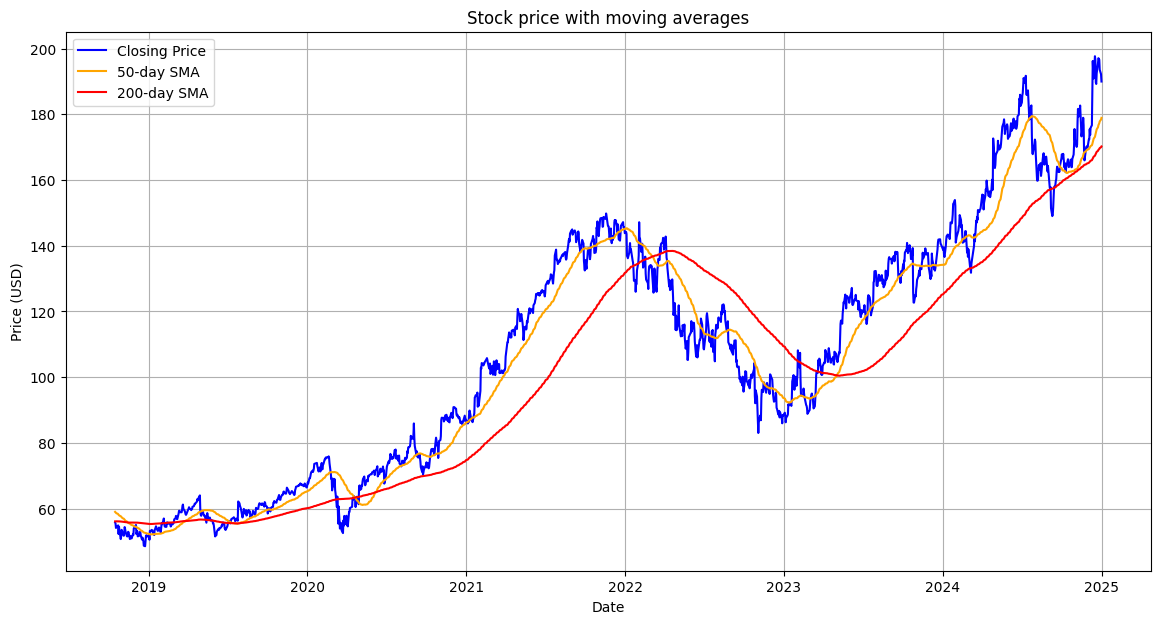

In [24]:
if not stockdata.empty:
  #feature engineering is to create simple mobving averages
  stockdata['SMA_50']=stockdata['Close'].rolling(window=50).mean()
  stockdata['SMA_200']=stockdata['Close'].rolling(window=200).mean()

  #dropign rows with the nan values from rolling mean calculation
  stockdata.dropna(inplace=True)
  #plotting rhe data
  plt.figure(figsize=(14,7))
  plt.plot(stockdata['Close'],label='Closing Price',color='blue')
  plt.plot(stockdata['SMA_50'],label='50-day SMA',color='orange')
  plt.plot(stockdata['SMA_200'],label='200-day SMA',color='red')
  plt.title('Stock price with moving averages')
  plt.xlabel('Date')
  plt.ylabel('Price (USD)')
  plt.legend()
  plt.grid(True)
  plt.show()
else:
  print("no data available to visualize")
